In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [2]:
FOLDER_EXECUTIONS = "../data/experiment_v05/cross_platform/executions"

In [3]:
config = load_config_and_check("../config/experiment_v05.yaml")

In [4]:
# scan the folders with executions 
# prepare all the possible pairs of comparisons

# get all the pairs refering to the same program_ID and from two different 
# platforms

# group the pairs per program_ID and yield the group

# so that the detector can analyze all the pairs in the same group and save a 
# single json refering to the same program_ID


In [5]:
def read_execution_folder(folder_with_execs, compiler_name):
    """Parse execution folder: info on the program_id and execution."""
    files = os.listdir(os.path.join(folder_with_execs, compiler_name))
    records = []
    for filename in files:
        new_record = {}
        new_record["compiler_name"] = compiler_name
        new_record["program_id"] = filename.split("_")[0]
        new_record["exec_iteration"] = filename.split("_")[1].replace(".json", "")
        new_record["filename"] = filename
        new_record["filepath"] = os.path.join(folder_with_execs, compiler_name, filename)
        records.append(new_record)
    return records

## Draft code for Multiple Execution Comparisons (move to lib already)

In [4]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]

In [63]:
all_records = []
for i_compiler in compilers_names:
    i_records = read_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)

In [68]:
def iterate_over_program_ids(execution_folder, compilers_names):
    """Iterate over all possible program_IDs.
    
    It yields the group with all pairs of executions refering to the same
    program_ID.
    """
    all_records = []
    for i_compiler in compilers_names:
        i_records = read_execution_folder(
            folder_with_execs=execution_folder, 
            compiler_name=i_compiler)
        all_records.extend(i_records)
    
    df_all = pd.DataFrame.from_records(all_records)
    
    df_all_pairs = create_pairs(
        df_all_executions=df_all, 
        compilers_names=compilers_names)
    
    for program_id in sorted(df_all_pairs["program_id"].unique()):
        print(f"program_id: {program_id}")
        # keep only pairs of this program ID
        df_single_program_id = df_all_pairs[
            df_all_pairs["program_id"] == program_id
        ]
        # prepare the pairs of paths to the two execution results 
        # from two different platforms
        pairs_single_program_id = list(zip(
            df_single_program_id["filepath_x"],
            df_single_program_id["filepath_y"]
        ))
        yield program_id, pairs_single_program_id
    

from itertools import combinations

def create_pairs(df_all_executions, compilers_names):
    """Create all comparisons of executions from different platforms."""
    
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    df_pairs_all_platforms = [] 
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df_a_b = pd.merge(df_a, df_b, on="program_id")
        df_pairs_all_platforms.append(df_a_b)
        
    df_all_pairs = pd.concat(df_pairs_all_platforms, axis= 1)
    return df_all_pairs
    

def iterate_over_pairs_of_group(pairs):
    """It iterates over the group made of pairs of json.
    
    It yields every time two dictionary representing the exection of the two
    elements in a pair.
    """
    for path_exec_a, path_exec_b in pairs:
        with open(path_exec_a, 'r') as f:
            res_a =  json.load(f)
        with open(path_exec_b, 'r') as f:
            res_b =  json.load(f)
        plat_a = path_exec_a.split("/")[-2]
        plat_b = path_exec_b.split("/")[-2]
        yield plat_a, plat_b, res_a, res_b    
    
    

In [67]:
for program_id, group_same_program_id in iterate_over_program_ids(
    execution_folder=FOLDER_EXECUTIONS, 
    compilers_names=compilers_names):
    print("G: ", group_same_program_id)
    for plat_a, plat_b, res_a, res_b in iterate_over_pairs_of_group(group_same_program_id):
        print("res_a: ", len(res_a))
        print("res_b: ", len(res_b))
        # ran detector
        
    # save detector result for this program_ID
    

program_id: 0
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_4.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_5.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_2.json'), ('../data/experiment_v05/cros

res_a:  690
res_b:  663
res_a:  690
res_b:  675
program_id: 10
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_9.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_2.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_plat

res_a:  4157
res_b:  4174
res_a:  4157
res_b:  4200
res_a:  4157
res_b:  4215
res_a:  4157
res_b:  4203
res_a:  4157
res_b:  4173
res_a:  4157
res_b:  4188
res_a:  4157
res_b:  4225
res_a:  4164
res_b:  4230
res_a:  4164
res_b:  4217
res_a:  4164
res_b:  4172
res_a:  4164
res_b:  4174
res_a:  4164
res_b:  4200
res_a:  4164
res_b:  4215
res_a:  4164
res_b:  4203
res_a:  4164
res_b:  4173
res_a:  4164
res_b:  4188
res_a:  4164
res_b:  4225
res_a:  4150
res_b:  4230
res_a:  4150
res_b:  4217
res_a:  4150
res_b:  4172
res_a:  4150
res_b:  4174
res_a:  4150
res_b:  4200
res_a:  4150
res_b:  4215
res_a:  4150
res_b:  4203
res_a:  4150
res_b:  4173
res_a:  4150
res_b:  4188
res_a:  4150
res_b:  4225
res_a:  4137
res_b:  4230
res_a:  4137
res_b:  4217
res_a:  4137
res_b:  4172
res_a:  4137
res_b:  4174
res_a:  4137
res_b:  4200
res_a:  4137
res_b:  4215
res_a:  4137
res_b:  4203
res_a:  4137
res_b:  4173
res_a:  4137
res_b:  4188
res_a:  4137
res_b:  4225
res_a:  4227
res_b:  4230
res_a:  4227

res_a:  368
res_b:  365
res_a:  368
res_b:  372
res_a:  368
res_b:  368
res_a:  368
res_b:  374
res_a:  368
res_b:  369
res_a:  368
res_b:  372
res_a:  368
res_b:  370
res_a:  368
res_b:  365
res_a:  368
res_b:  362
res_a:  368
res_b:  361
res_a:  368
res_b:  365
res_a:  376
res_b:  372
res_a:  376
res_b:  368
res_a:  376
res_b:  374
res_a:  376
res_b:  369
res_a:  376
res_b:  372
res_a:  376
res_b:  370
res_a:  376
res_b:  365
res_a:  376
res_b:  362
res_a:  376
res_b:  361
res_a:  376
res_b:  365
res_a:  373
res_b:  372
res_a:  373
res_b:  368
res_a:  373
res_b:  374
res_a:  373
res_b:  369
res_a:  373
res_b:  372
res_a:  373
res_b:  370
res_a:  373
res_b:  365
res_a:  373
res_b:  362
res_a:  373
res_b:  361
res_a:  373
res_b:  365
program_id: 3
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_platform/executions/cirq/3_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_pl

res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
res_a:  86
res_b:  87
res_a:  86
res_b:  79
res_a:  86
res_b:  95
res_a:  86
res_b:  83
res_a:  86
res_b:  78
res_a:  86
res_b:  76
res_a:  86
res_b:  77
res_a:  86
res_b:  86
res_a:  86
res_b:  83
res_a:  86
res_b:  86
res_a:  87
res_b:  87
res_a:  87
res_b:  79
res_a:  87
res_b:  95
res_a:  87
res_b:  83
res_a:  87
res_b:  78
res_a:  87
res_b:  76
res_a:  87
res_b:  77
res_a:  87
res_b:  86
res_a:  87
res_b:  83
res_a:  87
res_b:  86
res_a:  81
res_b:  87
res_a:  81
res_b:  79
res_a:  81
res_b:  95
res_a:  81
res_b:  83
res_a:  81
res_b:  78
res_a:  81
res_b:  76
res_a:  81
res_b:  77
res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
program_id: 6
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/cirq/6_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/

res_a:  7388
res_b:  7404
res_a:  7388
res_b:  7386
res_a:  7388
res_b:  7363
res_a:  7388
res_b:  7425
res_a:  7388
res_b:  7367
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7370
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7378
res_a:  7432
res_b:  7404
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7363
res_a:  7432
res_b:  7425
res_a:  7432
res_b:  7367
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7370
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7378
res_a:  7417
res_b:  7404
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7363
res_a:  7417
res_b:  7425
res_a:  7417
res_b:  7367
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7370
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7378
res_a:  7337
res_b:  7404
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7363
res_a:  7337
res_b:  7425
res_a:  7337
res_b:  7367
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7370
res_a:  7416

In [25]:
df_all.tail()

,compiler_name,program_id,exec_iteration,filename,filepath
235,cirq,11,7,11_7.json,../data/experiment_v05/cross_platform/executio...
236,cirq,3,6,3_6.json,../data/experiment_v05/cross_platform/executio...
237,cirq,8,7,8_7.json,../data/experiment_v05/cross_platform/executio...
238,cirq,1,4,1_4.json,../data/experiment_v05/cross_platform/executio...
239,cirq,11,8,11_8.json,../data/experiment_v05/cross_platform/executio...


In [31]:
from itertools import combinations

def iterate_over_pairs(df, compilers_names):
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df = pd.merge(df_a, df_b, on="program_id")
    
    
    

In [34]:
df_res = iterate_over_pairs(df=df_all, compilers_names=compilers_names)
df_res.head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...


In [35]:
df_res.sort_values(by=["program_id", "exec_iteration_x", "exec_iteration_y"]).head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
333,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,0,0_0.json,../data/experiment_v05/cross_platform/executio...
334,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,1,0_1.json,../data/experiment_v05/cross_platform/executio...
336,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,2,0_2.json,../data/experiment_v05/cross_platform/executio...
332,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,3,0_3.json,../data/experiment_v05/cross_platform/executio...
330,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,4,0_4.json,../data/experiment_v05/cross_platform/executio...


In [40]:
df_res

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...
...,...,...,...,...,...,...,...,...,...
1195,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,9,6_9.json,../data/experiment_v05/cross_platform/executio...
1196,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,5,6_5.json,../data/experiment_v05/cross_platform/executio...
1197,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,0,6_0.json,../data/experiment_v05/cross_platform/executio...
1198,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,1,6_1.json,../data/experiment_v05/cross_platform/executio...


In [49]:
df_res[
    (df_res["program_id"] == "1") &
    (df_res["exec_iteration_x"] == "6") &
    (df_res["exec_iteration_y"] == "7")
]

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...


## Read the KS results on multiple executions

In [27]:
FOLDER_DETECTOR = "../data/experiment_v05/cross_platform/predictions/ks"

all_records = []

for filename, detector_res in iterate_over(FOLDER_DETECTOR, filetype=".json", parse_json=True):
    print(f"Reading: {filename}")
    # remove the comparison
    pairs = detector_res.pop('comparisons', None)
        
    for pair in pairs:
        new_record = {**pair, **detector_res}
        all_records.append(new_record)
        
df_detector_results = pd.DataFrame.from_records(all_records)

Reading: 115
Reading: 101
Reading: 376
Reading: 343
Reading: 480
Reading: 136
Reading: 315
Reading: 303
Reading: 56
Reading: 408
Reading: 129
Reading: 434
Reading: 287
Reading: 79
Reading: 172
Reading: 280
Reading: 8
Reading: 463
Reading: 100
Reading: 69
Reading: 19
Reading: 227
Reading: 452
Reading: 223
Reading: 455
Reading: 479
Reading: 356
Reading: 78
Reading: 435
Reading: 321
Reading: 398
Reading: 285
Reading: 478
Reading: 453
Reading: 39
Reading: 32
Reading: 244
Reading: 163
Reading: 89
Reading: 199
Reading: 96
Reading: 58
Reading: 405
Reading: 121
Reading: 94
Reading: 176
Reading: 33
Reading: 148
Reading: 259
Reading: 178
Reading: 0
Reading: 16
Reading: 246
Reading: 30
Reading: 174
Reading: 450
Reading: 173
Reading: 55
Reading: 433
Reading: 494
Reading: 286
Reading: 34
Reading: 93
Reading: 119
Reading: 459
Reading: 4
Reading: 197
Reading: 111
Reading: 448
Reading: 59
Reading: 363
Reading: 12
Reading: 71
Reading: 65
Reading: 41
Reading: 456
Reading: 66
Reading: 29
Reading: 482
Rea

In [28]:
df_detector_results.head()

,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,test,test_long_name,comparison_name,circuit_id,random_seed
0,cirq,qiskit,../data/experiment_v05/cross_platform/executio...,../data/experiment_v05/cross_platform/executio...,0.012817,0.511501,ks,Kolmogorov–Smirnov Test,cross_platform,115,None
1,cirq,qiskit,../data/experiment_v05/cross_platform/executio...,../data/experiment_v05/cross_platform/executio...,0.014771,0.333291,ks,Kolmogorov–Smirnov Test,cross_platform,115,None
2,cirq,qiskit,../data/experiment_v05/cross_platform/executio...,../data/experiment_v05/cross_platform/executio...,0.013184,0.474887,ks,Kolmogorov–Smirnov Test,cross_platform,115,None
3,cirq,qiskit,../data/experiment_v05/cross_platform/executio...,../data/experiment_v05/cross_platform/executio...,0.012817,0.511501,ks,Kolmogorov–Smirnov Test,cross_platform,115,None
4,cirq,qiskit,../data/experiment_v05/cross_platform/executio...,../data/experiment_v05/cross_platform/executio...,0.008057,0.953082,ks,Kolmogorov–Smirnov Test,cross_platform,115,None


In [29]:
TOP_K = 10
print(f"TOP_K={TOP_K} most evident divergences")
df_grouped = df_detector_results.groupby(by="circuit_id").median().sort_values(by="p_value").reset_index()
df_grouped.head(TOP_K)

TOP_K=10 most evident divergences


,circuit_id,statistic,p_value
0,85,0.019043,0.102521
1,339,0.017944,0.142985
2,381,0.017822,0.148186
3,275,0.017456,0.164705
4,145,0.016235,0.230465
5,13,0.016113,0.238005
6,32,0.015991,0.245729
7,189,0.015869,0.253636
8,156,0.015869,0.253636
9,233,0.015869,0.253636


In [37]:
df_25times_8k_comparison = df_grouped
df_25times_8k_comparison = df_25times_8k_comparison.rename(
    columns={
        "circuit_id": "program_id",
        "p_value" : "p_value_median_25",
        "statistic": "stat_median_25"
    }
)

## Augment with program infos

In [44]:
INFO_PATH = "../data/experiment_v05/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,15,135,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,115,cross_platform
1,9,31,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,101,cross_platform
2,9,151,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,376,cross_platform
3,9,56,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,343,cross_platform
4,8,162,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,480,cross_platform


In [45]:
df_all = pd.merge(df_grouped, df_info, on="circuit_id")
df_all.head()

,circuit_id,statistic,p_value,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,85,0.019043,0.102521,17,47,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,339,0.017944,0.142985,11,177,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,381,0.017822,0.148186,11,199,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,275,0.017456,0.164705,12,143,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,145,0.016235,0.230465,18,165,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


Text(0.5, 1.0, 'P_value as a function of number of qubits')

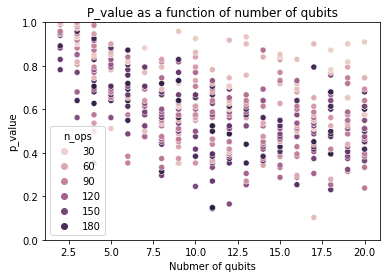

In [21]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_qubits",
    hue="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of qubits")
plt.title("P_value as a function of number of qubits")

Text(0.5, 1.0, 'P_value as a function of number of gates')

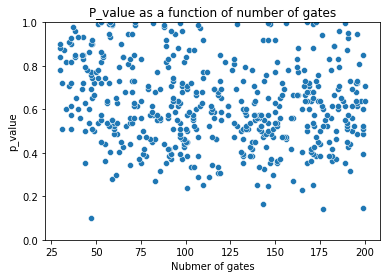

In [20]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of gates")
plt.title("P_value as a function of number of gates")

## Close-up

<AxesSubplot:xlabel='p_value', ylabel='Count'>

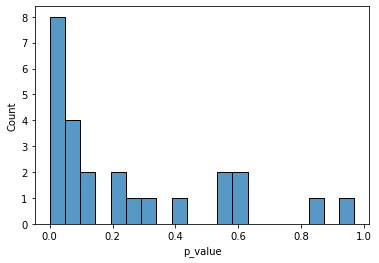

In [25]:
ID_TO_INSPECT = 85
df_single_circuit = df_detector_results[
    df_detector_results['circuit_id'] == str(ID_TO_INSPECT)
]
sns.histplot(
    df_single_circuit,
    x="p_value",
    bins=20
)


## Explore comparison with 40k shots 

In [6]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]
compilers_names

['qiskit', 'cirq']

In [7]:
all_records = []

for i_compiler in compilers_names:
    i_records = read_execution_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)
df_cirq = df_all[df_all["compiler_name"] == "cirq"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()
df_qiskit = df_all[df_all["compiler_name"] == "qiskit"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()


In [8]:
df_cirq.head()

,compiler_name,program_id,filepath
0,cirq,0,[../data/experiment_v05/cross_platform/executi...
1,cirq,1,[../data/experiment_v05/cross_platform/executi...
2,cirq,10,[../data/experiment_v05/cross_platform/executi...
3,cirq,100,[../data/experiment_v05/cross_platform/executi...
4,cirq,101,[../data/experiment_v05/cross_platform/executi...


In [10]:
df_comparisons = pd.merge(
    left=df_cirq.drop(columns=['compiler_name']),
    right=df_qiskit.drop(columns=['compiler_name']), 
    on='program_id',
    suffixes=("_cirq", "_qiskit")
)
df_comparisons.head()

,program_id,filepath_cirq,filepath_qiskit
0,0,[../data/experiment_v05/cross_platform/executi...,[../data/experiment_v05/cross_platform/executi...
1,1,[../data/experiment_v05/cross_platform/executi...,[../data/experiment_v05/cross_platform/executi...
2,10,[../data/experiment_v05/cross_platform/executi...,[../data/experiment_v05/cross_platform/executi...
3,100,[../data/experiment_v05/cross_platform/executi...,[../data/experiment_v05/cross_platform/executi...
4,101,[../data/experiment_v05/cross_platform/executi...,[../data/experiment_v05/cross_platform/executi...


In [11]:
example_list = df_cirq.iloc[0]['filepath']
example_list

['../data/experiment_v05/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_2.json']

In [13]:
example_list = df_comparisons.iloc[0]['filepath_cirq']
example_list

['../data/experiment_v05/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v05/cross_platform/executions/cirq/0_2.json']

In [14]:
from utils import load_json
from functools import reduce


def join_two_executions(exec_a, exec_b):
    return {
        k: exec_a.get(k, 0) + exec_b.get(k, 0)
        for k in set(exec_a) | set(exec_b)
    }


def read_multiple_execution_as_one(filepath_executions):
    """
    Join all the dictionary result in one.
    
    x = {'both1': 1, 'both2': 2, 'only_x': 100}
    y = {'both1': 10, 'both2': 20, 'only_y': 200}

    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) & set(y)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}
    
    Results:

        {'both2': 22, 'only_x': 100, 'both1': 11}
        {'both2': 22, 'both1': 11}
        {'only_y': 200, 'both2': 22, 'both1': 11, 'only_x': 100}
    """
    all_dicts = [
        load_json(
            filename=os.path.basename(filepath), 
            folder=os.path.dirname(filepath))
        for filepath in filepath_executions
    ]
    return reduce(join_two_executions, all_dicts)
    
    
final_shots = read_multiple_execution_as_one(
    filepath_executions=example_list)

In [15]:
final_shots

{'01100': 1321,
 '00000': 551,
 '00001': 14528,
 '10010': 695,
 '00111': 176,
 '11110': 362,
 '01101': 88,
 '11111': 146,
 '01000': 89,
 '11010': 21,
 '10100': 565,
 '01011': 246,
 '01001': 610,
 '10101': 86,
 '00110': 117,
 '10111': 238,
 '00011': 252,
 '11101': 359,
 '10001': 210,
 '00100': 7628,
 '11011': 535,
 '10000': 76,
 '11001': 5679,
 '01010': 1799,
 '01110': 302,
 '01111': 963,
 '10011': 109,
 '11100': 1938,
 '10110': 142,
 '00101': 911,
 '00010': 73,
 '11000': 145}

In [16]:
from detectors import KS_Detector

In [18]:
detector = KS_Detector()

In [ ]:
# iterate over all pairs

comparison_records = []

for i, row in df_comparisons.iterrows():
    print(i)
    i_record = {
        "program_id": row['program_id']
    }
    res_cirq = read_multiple_execution_as_one(row['filepath_cirq'])
    res_qiskit = read_multiple_execution_as_one(row['filepath_qiskit'])
    stat, p_value = detector.check(res_cirq, res_qiskit)
    i_record['p_value_40k'] = p_value
    i_record['stat_40k'] = stat
    comparison_records.append(i_record)

In [21]:
df_40k_comparison = pd.DataFrame.from_records(comparison_records)

In [22]:
df_40k_comparison.head()

,program_id,p_value_40k,stat_40k
0,0,0.101638,0.008521
1,1,0.875179,0.004126
2,10,0.795838,0.004517
3,100,0.588122,0.005396
4,101,0.999115,0.002588


In [26]:
#df_40k_comparison.to_csv("../data/experiment_v05/cross_platform/predictions/40k_comparisons.csv")

<AxesSubplot:xlabel='p_value_40k', ylabel='Count'>

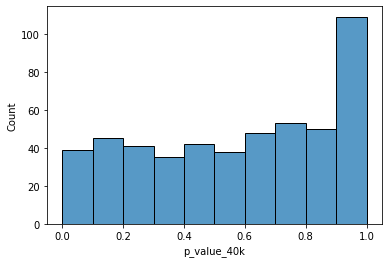

In [23]:
sns.histplot(
    df_40k_comparison,
    x="p_value_40k"
)

## 40kshots vs 25 times 8k

In [46]:
df_40_vs_25times = pd.merge(
    df_25times_8k_comparison,
    df_40k_comparison,
    on="program_id"
)
df_40_vs_25times.head()

,program_id,stat_median_25,p_value_median_25,p_value_40k,stat_40k
0,85,0.019043,0.102521,0.000863,0.013745
1,339,0.017944,0.142985,0.000887,0.013721
2,381,0.017822,0.148186,0.006513,0.011816
3,275,0.017456,0.164705,0.002693,0.012695
4,145,0.016235,0.230465,0.103383,0.008496


In [48]:
df_40_vs_25times_w_info = pd.merge(
    df_40_vs_25times, 
    df_info.rename(columns={"circuit_id": "program_id"}), 
    on="program_id")
df_40_vs_25times_w_info.head()

,program_id,stat_median_25,p_value_median_25,p_value_40k,stat_40k,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,85,0.019043,0.102521,0.000863,0.013745,17,47,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,339,0.017944,0.142985,0.000887,0.013721,11,177,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,381,0.017822,0.148186,0.006513,0.011816,11,199,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,275,0.017456,0.164705,0.002693,0.012695,12,143,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,145,0.016235,0.230465,0.103383,0.008496,18,165,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


(-0.1, 1.1)

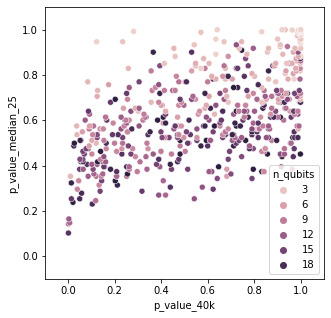

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_qubits",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))

(-0.1, 1.1)

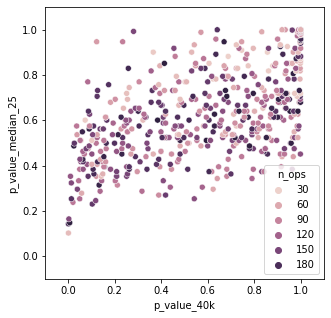

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_ops",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))